<img style="float: left;" src="images/unige_csd.png" alt="drawing" width="200"/>

# <center>Imagerie Numérique 2023 Automne</center>

<center>October 20, 2023</center>

---

# <center><ins>TP Class N°2 - HVS perception and colors</ins></center>

#### *Instructions :*  

* This TP should be completed and uploaded on Moodle before **Thursday 26 October 2023, 23h59**.
* <font color=red>The name of the file you upload should be **TP2_name_surname.ipynb**.</font>
* If you need to include attached files to you TP, please archive them together in a folder named **TP2_name_surname.zip**.

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import shape, uint8 as u8, uint32 as u32, float64 as f64
from numpy.typing import NDArray
from matplotlib.image import imread
import matplotlib.image as mpimg
from copy import deepcopy

def imshow_gray(data, show=True):
    plt.imshow(data, cmap="gray")
    if show: plt.show()


def imshow(data, show=True):
    plt.imshow(data)
    if show: plt.show()


def MSE(im1, im2):
    return np.sum((im1 - im2)**2) / (im1.shape[0] * im1.shape[1])


## Exercise 1 : 

*(1 point)*

### (a) What are the main components of the HVS as an optical system? What are the characteristics and limits of each of its components?


Talk about how we have very few, but very sensitive blue sensors, a bit more green, fairly sensitive and a lot of red sensors. 
We have 3 types of cones, each sensitive to a different wavelength. The brain then interprets the signal from the cones to give us the color we see.
Red color has the highest wavelength, then green, then blue. Blue color has a very high frequency, hence a much lower wavelength.

Talk about rodes for low light 1 color and cones for medium to high lightning for colors.





### (b) How does the human eye sense colors? What are the main qualities of achromatic and chromatic light?


(Achromatic light)  

Rods are : 

- very sensitive to light intensity
- achromatic (one color)

they are used for peripheral vision and they have slow response.

This means that in dark areas, to be able to see anything, the brains / they eyes "focuses" on rods at the expense of color distinction.
i.e. It's hard to distinguish colors in the dark because to be able to see we have to raise the sensitivity towards light but the what allows us to do that (the rods) are not sensitive to color.


(Chromatic light)

Cones are :

- Only sensitive to  relatively high intensity light 

---

## Exercise 2 : 
*(1 point)*

### (a) What is the NTSC-YIQ color space? What is the main domain of application for this color system? What is its advantage against RGB from an application point of view ?

--- Write your answer here ---

### (b) Write a function that takes an RGB image and converts it to the NTSC-YIQ format.
Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert
the RGB image *mnms.jpg* to the NTSC-YIQ using your function. Display each three
components as individual gray images. Explain the meaning of each component. 

*NB : If you use the matplotlib library to display grayscale images, pay attention to the
color maps (cmap) you are using or you might end up with strange coloured results.*

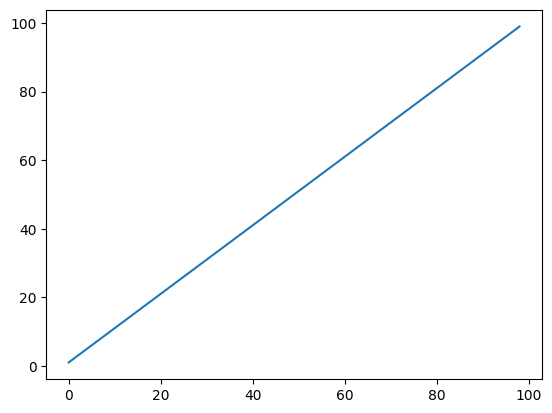

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1, 100))



--- Write your answer here ---

### (c) Apply python function *skimage.color.rgb2yiq* to the RGB image *mnms.jpg*. Compare the obtained result with the result of your function and explain the visual differences, if any.

--- Write your answer here ---

### (d) Use the python function *skimage.color.yiq2rgb* to convert the image back to RGB. Compute the MSE between the result image and the original one. Is this color system transformation lossless or lossy?

--- Write your answer here ---

---

## Exercise 3 :
*(1 point)*

### Redo Exercise 3 **(a)–(d)** for the YCbCr color system. 

### (a) What is the YCbCr color space? What is the main domain of application for this
color system? What is its advantage against RGB from an application point of view ?

--- Write your answer here ---

### (b) Write a function that takes an RGB image and converts it to the YCbCr format. Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert the RGB image *mnms.jpg* to the YCbCr using your function. Display each three components as individual gray images. Explain the meaning of each component.

--- Write your answer here ---

### (c) Use *skimage.color.rgb2ycbcr* to convert the RGB image *mnms.jpg* to the YCbCr format. Compare the obtained result with the result of your function and explain the visual differences, if any.

--- Write your answer here ---

### (d) Use *skimage.color.ycbcr2rgb* to convert the image back to RGB. Compute the MSE between the result image and the original one. Is this color system transformation lossless or lossy?

--- Write your answer here ---

---

## Exercise 4 : 

*(1 point)*

Redo Exercise 3 **(a)**, **(b)** and **(d)** for the CMY color system.

*NB: You will need however to write your own function cmy2rgb for part (d).*

### (a) What is the CMY color space? What is the main domain of application for this
color system? What is its advantage against RGB from an application point of view ?

CMY, Cyan Majenta Yellow, is a subtractive color mixing model, used for printing.

We cannot talk about advantages since we cannot use the rgb system to print.

The cyan magenta and yellow are complimentary To red green blue.

Which makes sense because on Screens. The default state of a pixel is black i.e. turned off, and then we merge a specific amount of red green and blue to obtain the color we want.

Whereas in printing the default state i.e. an empty sheet of paper is white, hence adding the same amount of the rgb colors to the white will not give the same the results.


### (b) Write a function that takes an RGB image and converts it to the CMY format. Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert the RGB image *mnms.jpg* to the CMY using your function. Display each three components as individual gray images. Explain the meaning of each component.

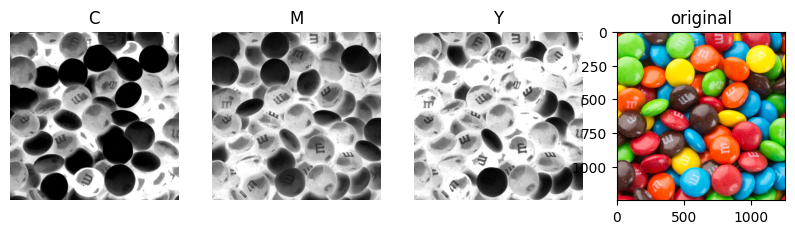

In [43]:
def rgb_2_cmy(cmy: NDArray[f64]) -> NDArray[f64]:
    return 1 - cmy

def MSE(im1, im2):
    return np.sum((im1 - im2)**2) / (im1.shape[0] * im1.shape[1])

im = plt.subplots(1, 4, figsize=(10, 5))
def image_plot(idx: int, data, title=None):
    plt.subplot(1, 4, idx)
    plt.title(title)
    plt.axis("off")
    imshow_gray(data, show=False)
    plt.title(['C', 'M', 'Y'][idx - 1])

img_mms = imread("mnms.jpg") / 255
orig: NDArray[f64] = np.array(img_mms, dtype=f64)

cmy_img = rgb_2_cmy(orig)
for i in range(3):
    image_plot(i + 1, cmy_img[:, :, i])

plt.subplot(1, 4, 4)
plt.title("original")
imshow(orig)
#imshow(orig)




1. C, The cyan component, will be the brightest when the image is most-cyan. i.e. in the shades of blue to green, but darker for the red components of the original image. (since cyan is the complementary of red)
2. M, The magenta component, idem for the shades of blue and red but darker for the green components of the original image. (since magenta is the complementary of green)
3. Y, The yellow component, idem for the shades of red and green but darker for the blue components of the original image. (since yellow is the complementary of blue)


### (d) Use *skimage.color.ycbcr2rgb* to convert the image back to RGB. Compute the MSE between the result image and the original one. Is this color system transformation lossless or lossy?


In [45]:
def rgb_2_cmy(cmy: NDArray[f64]) -> NDArray[f64]:
    return 1 - cmy


print("MSE: \n")
print("cmy2rgb: ", MSE(orig, rgb_2_cmy(cmy_img)))

MSE: 

cmy2rgb:  2.0262184475655653e-33


The mse is null, (lower than the average $\varepsilon_{mach}$ of the computer) so the transformation is lossless.

### (d) Write a function that takes a CMY image and converts it to the RGB format. Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert the CMY image *mnms.jpg* to the RGB using your function. Display each three components as individual gray images. Explain the meaning of each component.

--- Write your answer here ---

---

## Exercise 5 : 

*(1 point)*

### (a) Explain the difference between the CMY and CMYK color spaces.

--- Write your answer here ---

Redo Exercise 4 **(b)** and **(d)** for the CMYK color space.

### (b) Write a function that takes an RGB image and converts it to the CMYK format. Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert the RGB image *mnms.jpg* to the CMYK using your function. Display each four components as individual gray images. Explain the meaning of each component.

--- Write your answer here ---

### (d) Write a function that takes a CMYK image and converts it to the RGB format. Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert the CMYK image *mnms.jpg* to the RGB using your function. Display each three components as individual gray images. Explain the meaning of each component.

--- Write your answer here ---

---

## Exercise 6 :

(1 point)

### (a) Outline the primary focusing disorders in the human visual system (HVS). Detail current solutions for each. Organize the information in a schematic format.

*Hint: emmetropia, myopia, hypermetropia, astigmatism*

--- Write your answer here ---

### (b) Compare focusing mechanisms in the human visual system (HVS) and contemporary cameras. Highlight the key differences.

--- Write your answer here ---